In [132]:
import subprocess as sp
import os, time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def formatDataStr(data):
    dataStr = []
    for i in range(len(data)):
        if i == 0:
            dataStr.append('{0:.16e}'.format(data[i]))
        else:
            dataStr.append('{0:.8e}'.format(data[i]))
    dataStr = ','.join(dataStr) + '\n'
    return dataStr

path = '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/'

In [21]:
fileNames = os.listdir(path)
files = [path + s for s in fileNames]
files = sorted(files, key = os.path.getctime)
files

['/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105057.txt',
 '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105057RAW.txt',
 '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105711RAW.txt',
 '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105711.txt',
 '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105855.txt',
 '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105855RAW.txt',
 '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105900.txt',
 '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105900RAW.txt',
 '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-111026RAW.txt',
 '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-111026.txt',
 '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-111459.txt',
 '/home/polarbear/PB2B_Backend/Cooldown_Runs/20170

In [73]:
data = np.array([])
for f in files:
    if f[-7:] != 'RAW.txt':
        print 'loading from: ', f
        newData = np.loadtxt(f, skiprows = 3, delimiter = ',')
        print 'data shape: ', np.shape(newData)
        if len(newData) != 0:
            if len(data) == 0:
                data = newData
            else:
                data = np.vstack((data, newData))

loading from:  /home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105057.txt
data shape:  (7, 28)
loading from:  /home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105711.txt
data shape:  (0,)
loading from:  /home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105855.txt
data shape:  (0,)
loading from:  /home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-105900.txt
data shape:  (7, 28)
loading from:  /home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-111026.txt
data shape:  (3, 28)
loading from:  /home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-111459.txt
data shape:  (6, 28)
loading from:  /home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-112031.txt
data shape:  (0,)
loading from:  /home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Data/20170212-112039.txt
data shape:  (5, 28)
loading from:  /home/polarbear/PB2B_Backend/Cooldown_Runs/20170210-05b/Da

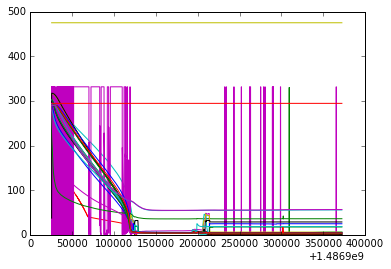

In [93]:
plt.figure()
for i in range(1, np.shape(data)[1], 1):
    if i != 6 or i != 7 or i != 8:
        plt.plot(data[:, 0], data[:, i])

In [135]:
with open(files[-1], 'r') as f:
    f.seek(66)
    column_headers = f.readline()
    
headerStr = 'Date: ' + time.strftime("%Y/%m/%d") + ', Time: ' + \
            time.strftime("%H:%M:%S") + '\n________________________________\n' + column_headers

masterFileName = time.strftime("%Y%m%d-%H%M%S" + '_MASTER.txt')

with open(masterFileName, 'w') as f:
    f.write(headerStr)
    f.write(data)

In [130]:
time.strftime("%Y%m%d-%H%M%S")

'20170216-155943'

In [134]:
data

array([[  1.48692546e+09,   3.00782604e+02,   2.66637630e+02, ...,
          2.89986000e+02,   2.89986000e+02,   4.75000000e+02],
       [  1.48692551e+09,   2.94572050e+02,   2.94242213e+02, ...,
          2.89986000e+02,   2.89986000e+02,   4.75000000e+02],
       [  1.48692555e+09,   2.94588964e+02,   2.94225030e+02, ...,
          2.89986000e+02,   2.89986000e+02,   4.75000000e+02],
       ..., 
       [  1.48727214e+09,   3.69203817e-01,   3.37148840e-01, ...,
          5.57196478e+01,   5.65431222e+01,   4.75000000e+02],
       [  1.48727219e+09,   3.69430479e-01,   3.37175289e-01, ...,
          5.57214484e+01,   5.65443226e+01,   4.75000000e+02],
       [  1.48727224e+09,   3.69773045e-01,   3.37066729e-01, ...,
          5.57220486e+01,   5.65455230e+01,   4.75000000e+02]])